<a href="https://colab.research.google.com/github/massirism/ML-UNS/blob/main/TP5_Massiris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
#Crimenes en USA

import pandas as pd
violent_crime = pd.read_csv("https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectUSA/data/violent_crime.csv")
violent_crime.head()


df=violent_crime
#df.shape
#Cambio el nombre de "Unnamed: 0" a "State"
df=df.rename(columns={'Unnamed: 0':'State'})

estados=df.loc[:,'State']
datos=df.drop(['State'],axis=1)
estados.head()
#datos.head()
#print(len(violent_crime))  #Bien, tengo los 50 estados de USA.
#violent_crime.describe()

Nos pedían realizar más de un método de clustering en el planteo del problema, entonces yo aplicaré 2:   


1.   K-means
2.   Hierarchical Clustering



In [39]:
#EMPIEZO CON K-MEANS.

#Líbrerías
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
from numpy import random, float, array
import seaborn as sns
import matplotlib.axes as axes
from sklearn.preprocessing import StandardScaler


In [40]:
#Con los cuatro parámetros que tengo buscaré el número óptimo de clusters
X = df[['Murder', 'Assault', 'Rape', 'UrbanPop']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform( X )
cluster_range = range( 1, 20 )
cluster_errors = []

for num_clusters in cluster_range:
  clusters = KMeans( num_clusters )
  clusters.fit( X_scaled )
  cluster_errors.append( clusters.inertia_ )

clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )

clusters_df[0:20]

,num_clusters,cluster_errors
0,1,200.000000
1,2,104.961633
2,3,79.921703
3,4,57.554259
4,5,50.972488
5,6,44.592906
6,7,39.038411
7,8,37.255417
8,9,30.988486
9,10,28.162977


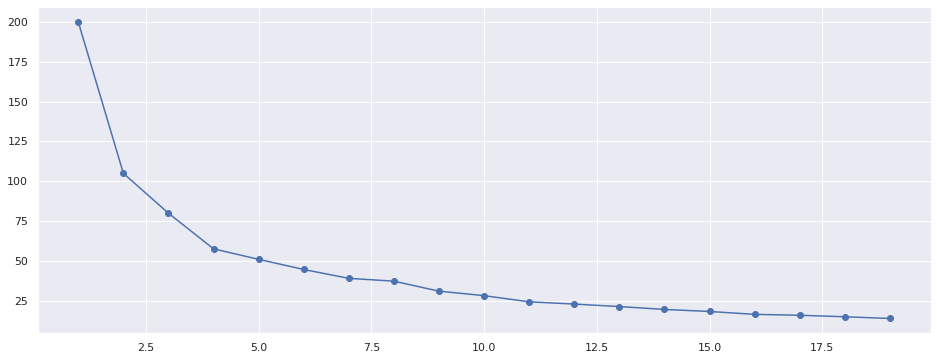

In [41]:
#Para ver como se comporta el error con respecto al numero de clusters hago la siguiente gráfica
plt.figure(figsize=(16,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" );

Como se puede ver a medida que aumenta el número de clusters baja el error, eso es lo esperado. Ahora hay que seleccionar el más óptimo. En nuestro caso se ve que la curva empieza a suavizarse desde 5, entonces usaré 5 clusters.

In [42]:
num_clusters=5
X = df[['Murder', 'Assault', 'Rape', 'UrbanPop']]

clusters = KMeans(num_clusters)  # 5 clusters
clusters.fit( X )
clusters.cluster_centers_
clusters.labels_

df['Crime_clusters'] = clusters.labels_
df.head()
df.sort_values(by=['Crime_clusters'],ascending = True)
#X.head()
print(df)

             State  Murder  Assault  UrbanPop  Rape  Crime_clusters
0          Alabama    13.2      236        58  21.2               1
1           Alaska    10.0      263        48  44.5               1
2          Arizona     8.1      294        80  31.0               4
3         Arkansas     8.8      190        50  19.5               2
4       California     9.0      276        91  40.6               1
5         Colorado     7.9      204        78  38.7               2
6      Connecticut     3.3      110        77  11.1               0
7         Delaware     5.9      238        72  15.8               1
8          Florida    15.4      335        80  31.9               4
9          Georgia    17.4      211        60  25.8               2
10          Hawaii     5.3       46        83  20.2               3
11           Idaho     2.6      120        54  14.2               0
12        Illinois    10.4      249        83  24.0               1
13         Indiana     7.2      113        65  2

No veo la necesidad de normalizarlos porque están en la misma escala.

En el siguiente paso busco relacionar cada variable, unas con otras.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


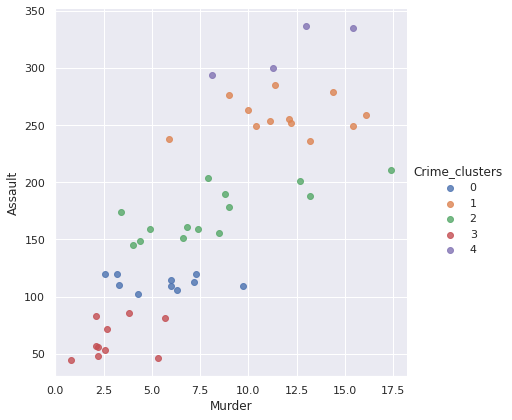

In [43]:
#Empiezo con asesinato y asalto, veamos que tan relacionadas están.
sns.lmplot( 'Murder','Assault',  data=df,
        hue = 'Crime_clusters',
        fit_reg=False, size = 6);

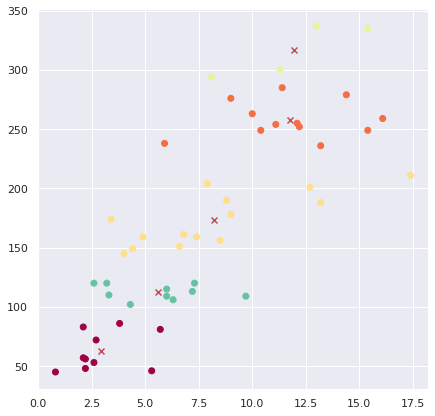

In [44]:
#Estados como Alabama,Alaska,Illinois,Michigan pertenecen cluster amarillo.
#Si hago lo mismo pero esta vez úbicando los clusters puedo ver que tan relacionados están con más precisión

data=X
clusters = KMeans(num_clusters);  #Le paso el numero de clusters.
clusters.fit(X);  #Entreno K-means.
plt.figure(figsize=(7, 7))
clusters.labels_;
centers = np.array(clusters.cluster_centers_)
plt.scatter(centers[:,0], centers[:,1], marker="x", color='r')
plt.scatter(data.iloc[:,0],data.iloc[:,1], c=[plt.cm.Spectral(float(i) /5) for i in clusters.labels_]); 
#print(data)
#print(centers)

Se puede ver que asesinatos y asaltos muestran una relación bastante líneal viendo los clusters (x). Se puede ver también que se agrupan bien los datos a los clusters seleccionados, solo dudo en puntos como el (13,330) creo que debería ser del cuarto cluster.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


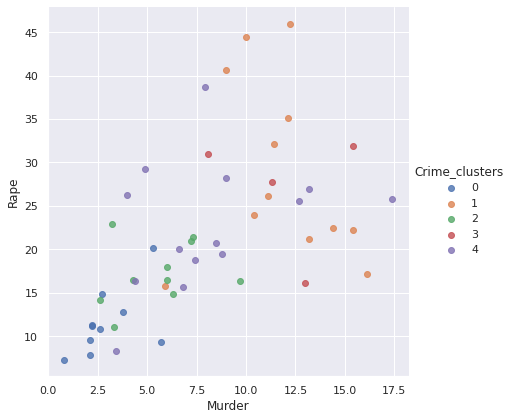

In [45]:
num_clusters=5
X = df[['Murder', 'Assault', 'Rape', 'UrbanPop']]

clusters = KMeans(num_clusters)  # 5 clusters
clusters.fit( X )
clusters.cluster_centers_
clusters.labels_

df['Crime_clusters'] = clusters.labels_
df.head()
df.sort_values(by=['Crime_clusters'],ascending = True)
X.head()

#Ahora analizaré asesinato y violanción

sns.lmplot( 'Murder','Rape',  data=df,
        hue ='Crime_clusters',
        fit_reg=False, size = 6 );

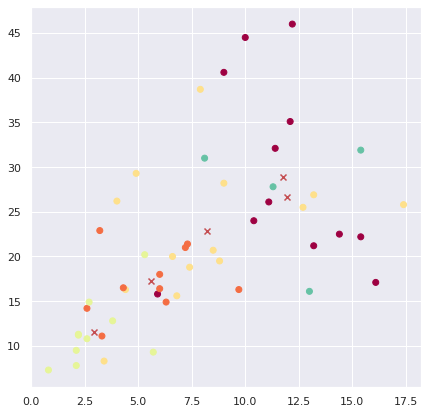

In [46]:
# Lo mismo pero poniendo los clusters.

data=X
clusters = KMeans(num_clusters);
clusters.fit(X);
plt.figure(figsize=(7, 7))
clusters.labels_;
centers = np.array(clusters.cluster_centers_)
plt.scatter(centers[:,0], centers[:,2], marker="x", color='r')
plt.scatter(data.iloc[:,0],data.iloc[:,2], c=[plt.cm.Spectral(float(i) /5) for i in clusters.labels_]);

Viendo que hasta se superponen dos cluster's es claro que estas variables no tienen una correlación clara, hay valores muy dispersos e incluso puntos que se le adjudican a un cluster que realmente podrían pertenecer a uno más cercano.

In [47]:
#Para ver bien el tema de la correlación me fijaré con las variables directamente
correlacion_de_variables = df[['Murder', 'Assault', 'Rape', 'UrbanPop']]
correlacion_de_variables.corr()

,Murder,Assault,Rape,UrbanPop
Murder,1.000000,0.801873,0.563579,0.069573
Assault,0.801873,1.000000,0.665241,0.258872
Rape,0.563579,0.665241,1.000000,0.411341
UrbanPop,0.069573,0.258872,0.411341,1.000000


Ahora es posible analizar con mayor facilidad la correlación entre las variables.Por ejemplo asombra ver como el 50% de los asesinatos también se lleva a cabo la violación. A su vez, el tener una poblaciín grande tiene una correlación casi nula con el asesinato.

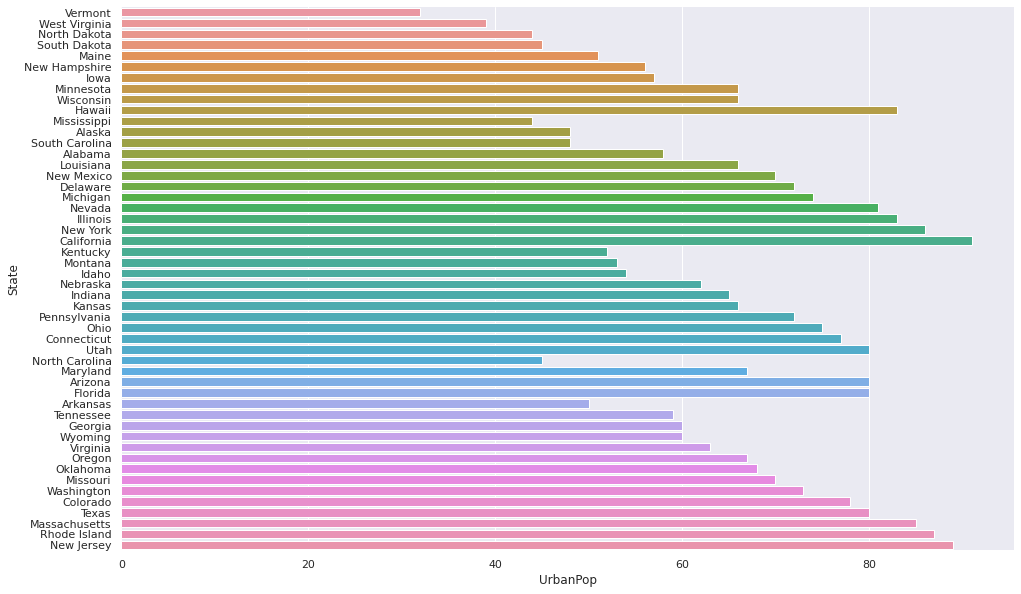

In [49]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(16, 10))

# Load the dataset
stats = df.sort_values([ "Crime_clusters", "UrbanPop"], ascending=True)
sns.set_color_codes("pastel")
sns.barplot(y="State", x="UrbanPop", data=stats)

sns.despine(left=True, bottom=True)

Del gráfico podriamos concluir a que clusters pertenecen cada estado:


*   Cluster 0: 
    Arizona,Florida,Maryland,etc..
*   Cluster 1: 
    Connecticut,Idaho,Kansas, etc...
*   Cluster 2: 
    Arkansas,Colorado,Missouri,etc...
*   Cluster 3: 
    Alabama,Alaska,Arkansas,etc...
*   Cluster 4: 
  North Dakota,Hawaii,Iowa,etc...



# PARTE 2 (Hierarchical Clustering)
Bueno, ahora pasaré a realizar el mismo procedimiento pero usando Hierarchical Clustering.

In [50]:
#Librerías
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.preprocessing import StandardScaler

import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

sns.set()

In [55]:
import pandas as pd
violent_crime = pd.read_csv("https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectUSA/data/violent_crime.csv")
violent_crime.head()


df2=violent_crime

df2=df2.rename(columns={'Unnamed: 0':'State'})

estados2=df2.loc[:,'State']
datos2=df2.drop(['State'],axis=1)
#estados2.head()
#df2.shape
print(df2)


             State  Murder  Assault  UrbanPop  Rape
0          Alabama    13.2      236        58  21.2
1           Alaska    10.0      263        48  44.5
2          Arizona     8.1      294        80  31.0
3         Arkansas     8.8      190        50  19.5
4       California     9.0      276        91  40.6
5         Colorado     7.9      204        78  38.7
6      Connecticut     3.3      110        77  11.1
7         Delaware     5.9      238        72  15.8
8          Florida    15.4      335        80  31.9
9          Georgia    17.4      211        60  25.8
10          Hawaii     5.3       46        83  20.2
11           Idaho     2.6      120        54  14.2
12        Illinois    10.4      249        83  24.0
13         Indiana     7.2      113        65  21.0
14            Iowa     2.2       56        57  11.3
15          Kansas     6.0      115        66  18.0
16        Kentucky     9.7      109        52  16.3
17       Louisiana    15.4      249        66  22.2
18          

Text(0, 0.5, 'UrbanPop')

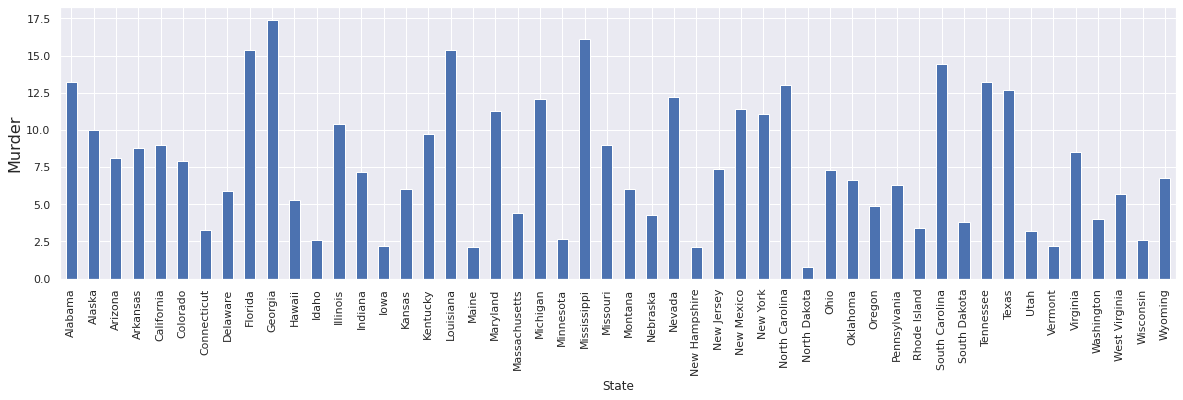

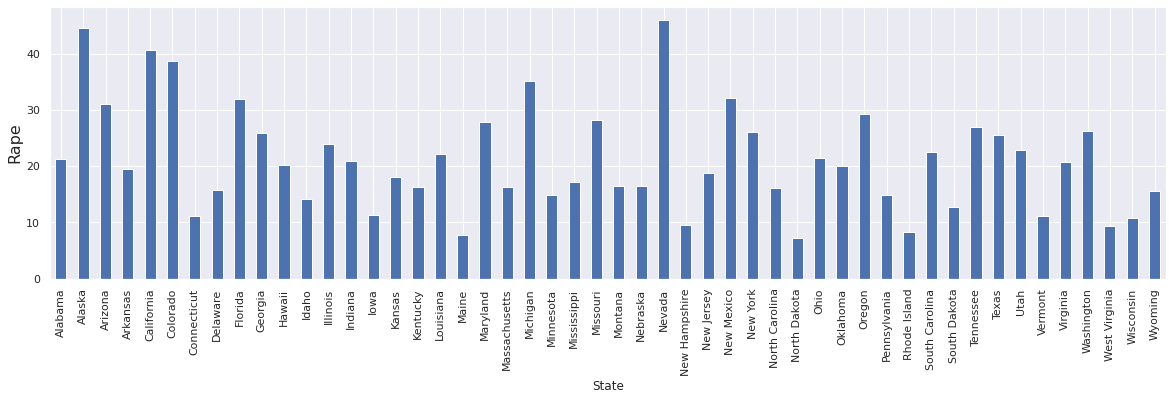

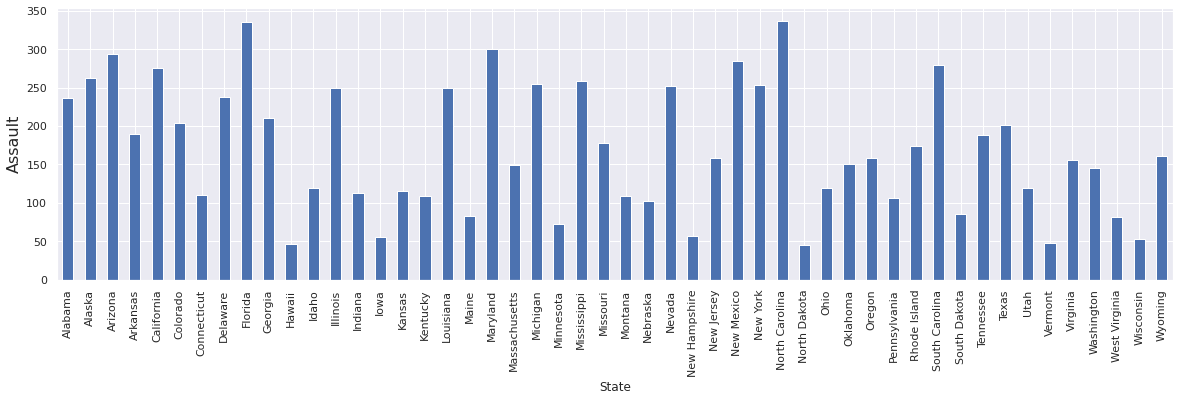

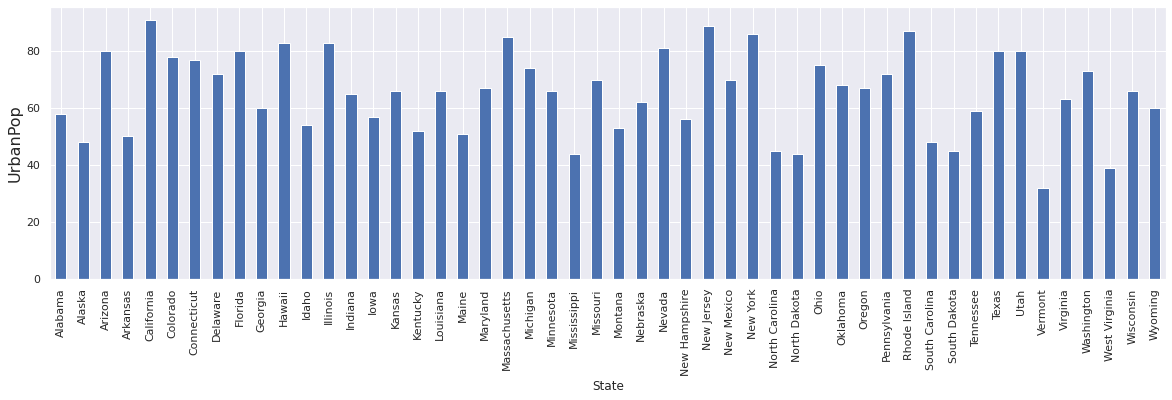

In [62]:
#Probaré analizar los asesinatos en cada estado 
plt.figure(figsize=(20,5))
df2.groupby('State')['Murder'].max().plot(kind='bar')
plt.ylabel("Murder", size = 16)

#Violación en cada estado
plt.figure(figsize=(20,5))
df2.groupby('State')['Rape'].max().plot(kind='bar')
plt.ylabel("Rape", size = 16)

#Asalto en cada estado
plt.figure(figsize=(20,5))
df2.groupby('State')['Assault'].max().plot(kind='bar')
plt.ylabel("Assault", size = 16)

#La población urbana de cada estado
plt.figure(figsize=(20,5))
df2.groupby('State')['UrbanPop'].max().plot(kind='bar')
plt.ylabel("UrbanPop", size = 16)

Se puede ver que los 3 estados con mayor criminalidad son: Georgia,Missisippi y Florida/Lousisana(está reñido). Y muchos datos más que podrían ser de importancia.

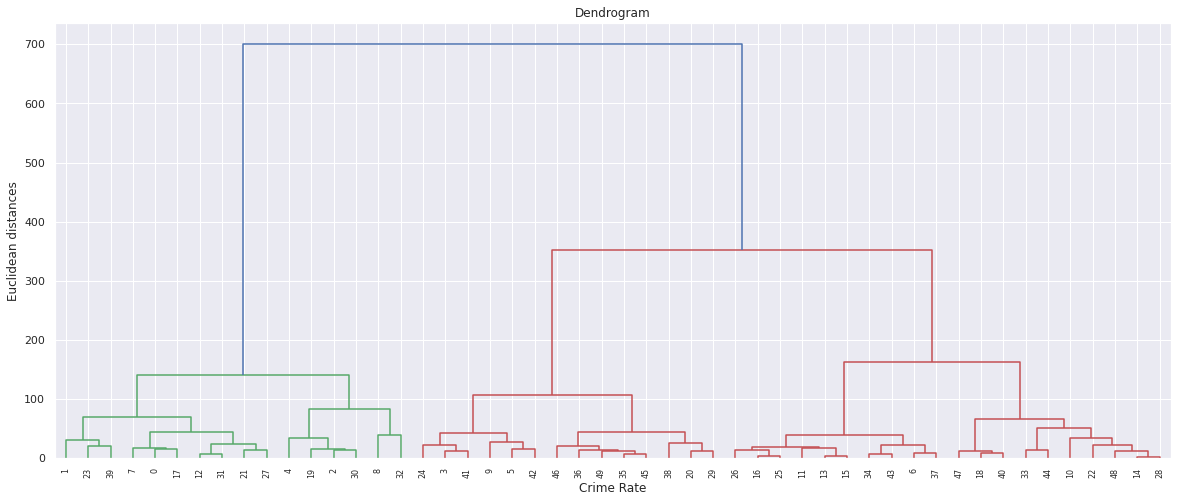

In [66]:
data = df2.iloc[:,1:].values
scaled_data = scaler.fit_transform(data)

#Usaré el método de "ward" para tener el el dendograma que me permita elegir el número de clusters óptimo
#Si desea saber más dsobre este método, dejaré un enlace abajo.
plt.figure(figsize=(20,8))
dendrogram = sch.dendrogram(sch.linkage(data, method  = "ward"))
plt.title('Dendrogram')
plt.xlabel('Crime Rate')
plt.ylabel('Euclidean distances')
plt.show()

**Método Ward:**  https://es.wikipedia.org/wiki/Método_de_Ward

Ahora, para seleccionar el número de clusters óptimo buscamos la mayor distancia que podamos verticalmente sin cruzar ninguna línea horizontal y ésta es la línea enmarcada en rojo en el diagrama anterior. Contemos el número de líneas en el diagrama y determinemos el número óptimo de clusters. Que para este caso serían 3. 

In [67]:
#Conociendo el numero de clusters puedo entrenar el agglomerative clustering
num_clusters=3
AC = AgglomerativeClustering(n_clusters = num_clusters, affinity = 'euclidean', linkage ='ward')

In [70]:
# Ahora entreno y predigo para cada estado el cluster que se le asigna.
y_pred =AC.fit_predict(data)
y_pred
#print(len(y_pred))

array([1, 1, 1, 2, 1, 2, 0, 1, 1, 2, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 2, 1,
       0, 1, 2, 0, 0, 1, 0, 2, 1, 1, 1, 0, 0, 2, 2, 0, 2, 1, 0, 2, 2, 0,
       0, 2, 2, 0, 0, 2])

In [71]:
#Ahora simplemente muestro la predicción para cada estado
df2['cluster labels']= y_pred

df2[['State','cluster labels']]

,State,cluster labels
0,Alabama,1
1,Alaska,1
2,Arizona,1
3,Arkansas,2
4,California,1
5,Colorado,2
6,Connecticut,0
7,Delaware,1
8,Florida,1
9,Georgia,2


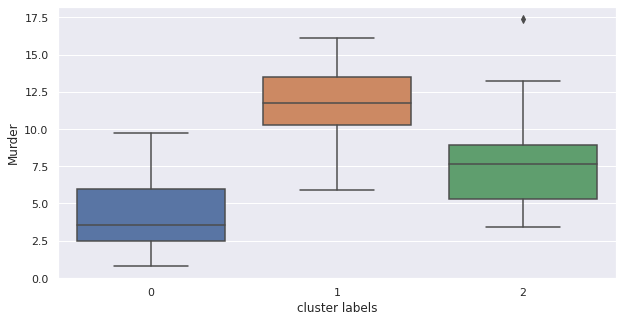

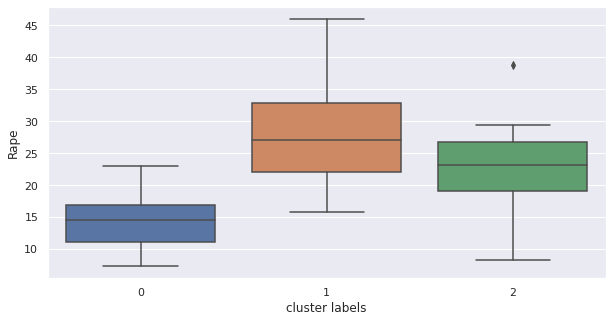

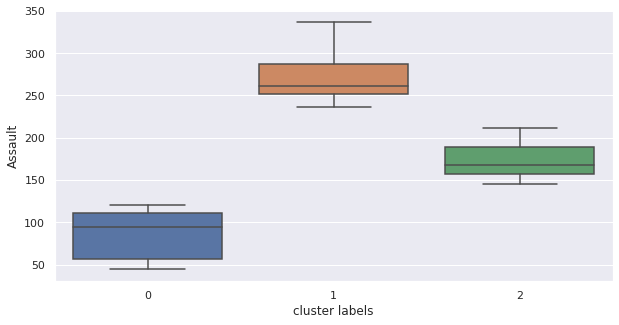

In [75]:
#Ahora presentaré como quedan los estados divididos en los 3 clusters para cada variable (asalto, violación y asesinato)

#Asesinato
plt.figure(figsize=(10,5))
sns.boxplot(x='cluster labels', y='Murder', data=df2)

#Violación
plt.figure(figsize=(10,5))
sns.boxplot(x='cluster labels', y='Rape', data=df2)

#Asalto
plt.figure(figsize=(10,5))
sns.boxplot(x='cluster labels', y='Assault', data=df2)

Se puede ver que para los estados del "cluster 0" son las más seguras porque es donde hay menos asesinatos, asaltos y violaciones.Los estados del "cluster 1" en cambio son los más peligrosos, teniendo una alta densidad de asaltos,asesinatos y violaciones.

In [76]:
#Estos son los estados seguros.
estados_seguros= df2.groupby('cluster labels')['State'].unique()[0] #Para el cluster 0
estados_seguros

array(['Connecticut', 'Hawaii', 'Idaho', 'Indiana', 'Iowa', 'Kansas',
       'Kentucky', 'Maine', 'Minnesota', 'Montana', 'Nebraska',
       'New Hampshire', 'North Dakota', 'Ohio', 'Pennsylvania',
       'South Dakota', 'Utah', 'Vermont', 'West Virginia', 'Wisconsin'],
      dtype=object)

In [78]:
#Estados peligrosos
estados_peligrosos= df2.groupby('cluster labels')['State'].unique()[1]
estados_peligrosos

array(['Alabama', 'Alaska', 'Arizona', 'California', 'Delaware',
       'Florida', 'Illinois', 'Louisiana', 'Maryland', 'Michigan',
       'Mississippi', 'Nevada', 'New Mexico', 'New York',
       'North Carolina', 'South Carolina'], dtype=object)

In [79]:
#Estados que no pertenecen a los casos anteriores
estados_promedio= df2.groupby('cluster labels')['State'].unique()[2]
estados_promedio

array(['Arkansas', 'Colorado', 'Georgia', 'Massachusetts', 'Missouri',
       'New Jersey', 'Oklahoma', 'Oregon', 'Rhode Island', 'Tennessee',
       'Texas', 'Virginia', 'Washington', 'Wyoming'], dtype=object)

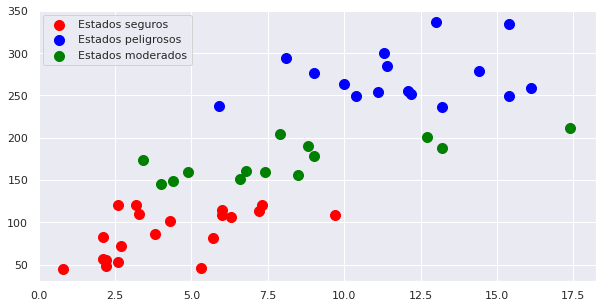

In [80]:
#Ahora mostraré los estados ya separados en un gráfico de puntos
plt.figure(figsize=(10,5))
plt.scatter(data[y_pred==0, 0], data[y_pred==0, 1], s=100, c='red', label ='Estados seguros')
plt.scatter(data[y_pred==1, 0], data[y_pred==1, 1], s=100, c='blue', label ='Estados peligrosos')
plt.scatter(data[y_pred==2, 0], data[y_pred==2, 1], s=100, c='green', label ='Estados moderados')
plt.legend()
plt.show() 

# Conclusión
En mi opinión el mejor de los dos es el clustering jerárquico porque con menos clusters se obtiene una mejor clasificación de los estados, es cierto que hay un par de estados en duda pero son menos comparados a los vistos por el método de K-Means.
